In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

from apollon.som.som import IncrementalMap
import apollon.som.utilities as asu
import apollon.som.plot as asp
import mrplot

## 1.1 Preprocessing

In [3]:
data = pd.read_csv('../data/features.csv', index_col=0)

In [4]:
features = ['centroid_mean', 'centroid_std',
            'spread_mean', 'spread_std',
            'skewness_mean', 'skewness_std',
            'kurtosis_mean', 'kurtosis_std',
            'flux_mean', 'flux_std',
            'roughness_mean', 'roughness_std',
            'sharpness_mean', 'sharpness_std',
            'loudness_mean', 'loudness_std']

In [5]:
training_data = data[features].to_numpy()

In [6]:
enc = LabelEncoder()
target_codes = enc.fit_transform(data['collection'])

## 2. Fit Self-organizing map

In [7]:
# dimensions of SOM (n_rows, n_cols, n_features)
dims = (20, 35, len(features))

# number of iterations
n_iter = 100

# initial learning rate
eta = .05       

# initial neighborhood radius
nhr = 11

# the distance metric
metric = 'euclidean'

In [8]:
som = IncrementalMap(dims, n_iter, eta, nhr, metric=metric)

In [9]:
%time som.fit(training_data)

CPU times: user 9.13 s, sys: 141 ms, total: 9.27 s
Wall time: 9.28 s


In [10]:
bmu = som.match(training_data)
bmu_xy = np.fliplr(np.atleast_2d(bmu)).T

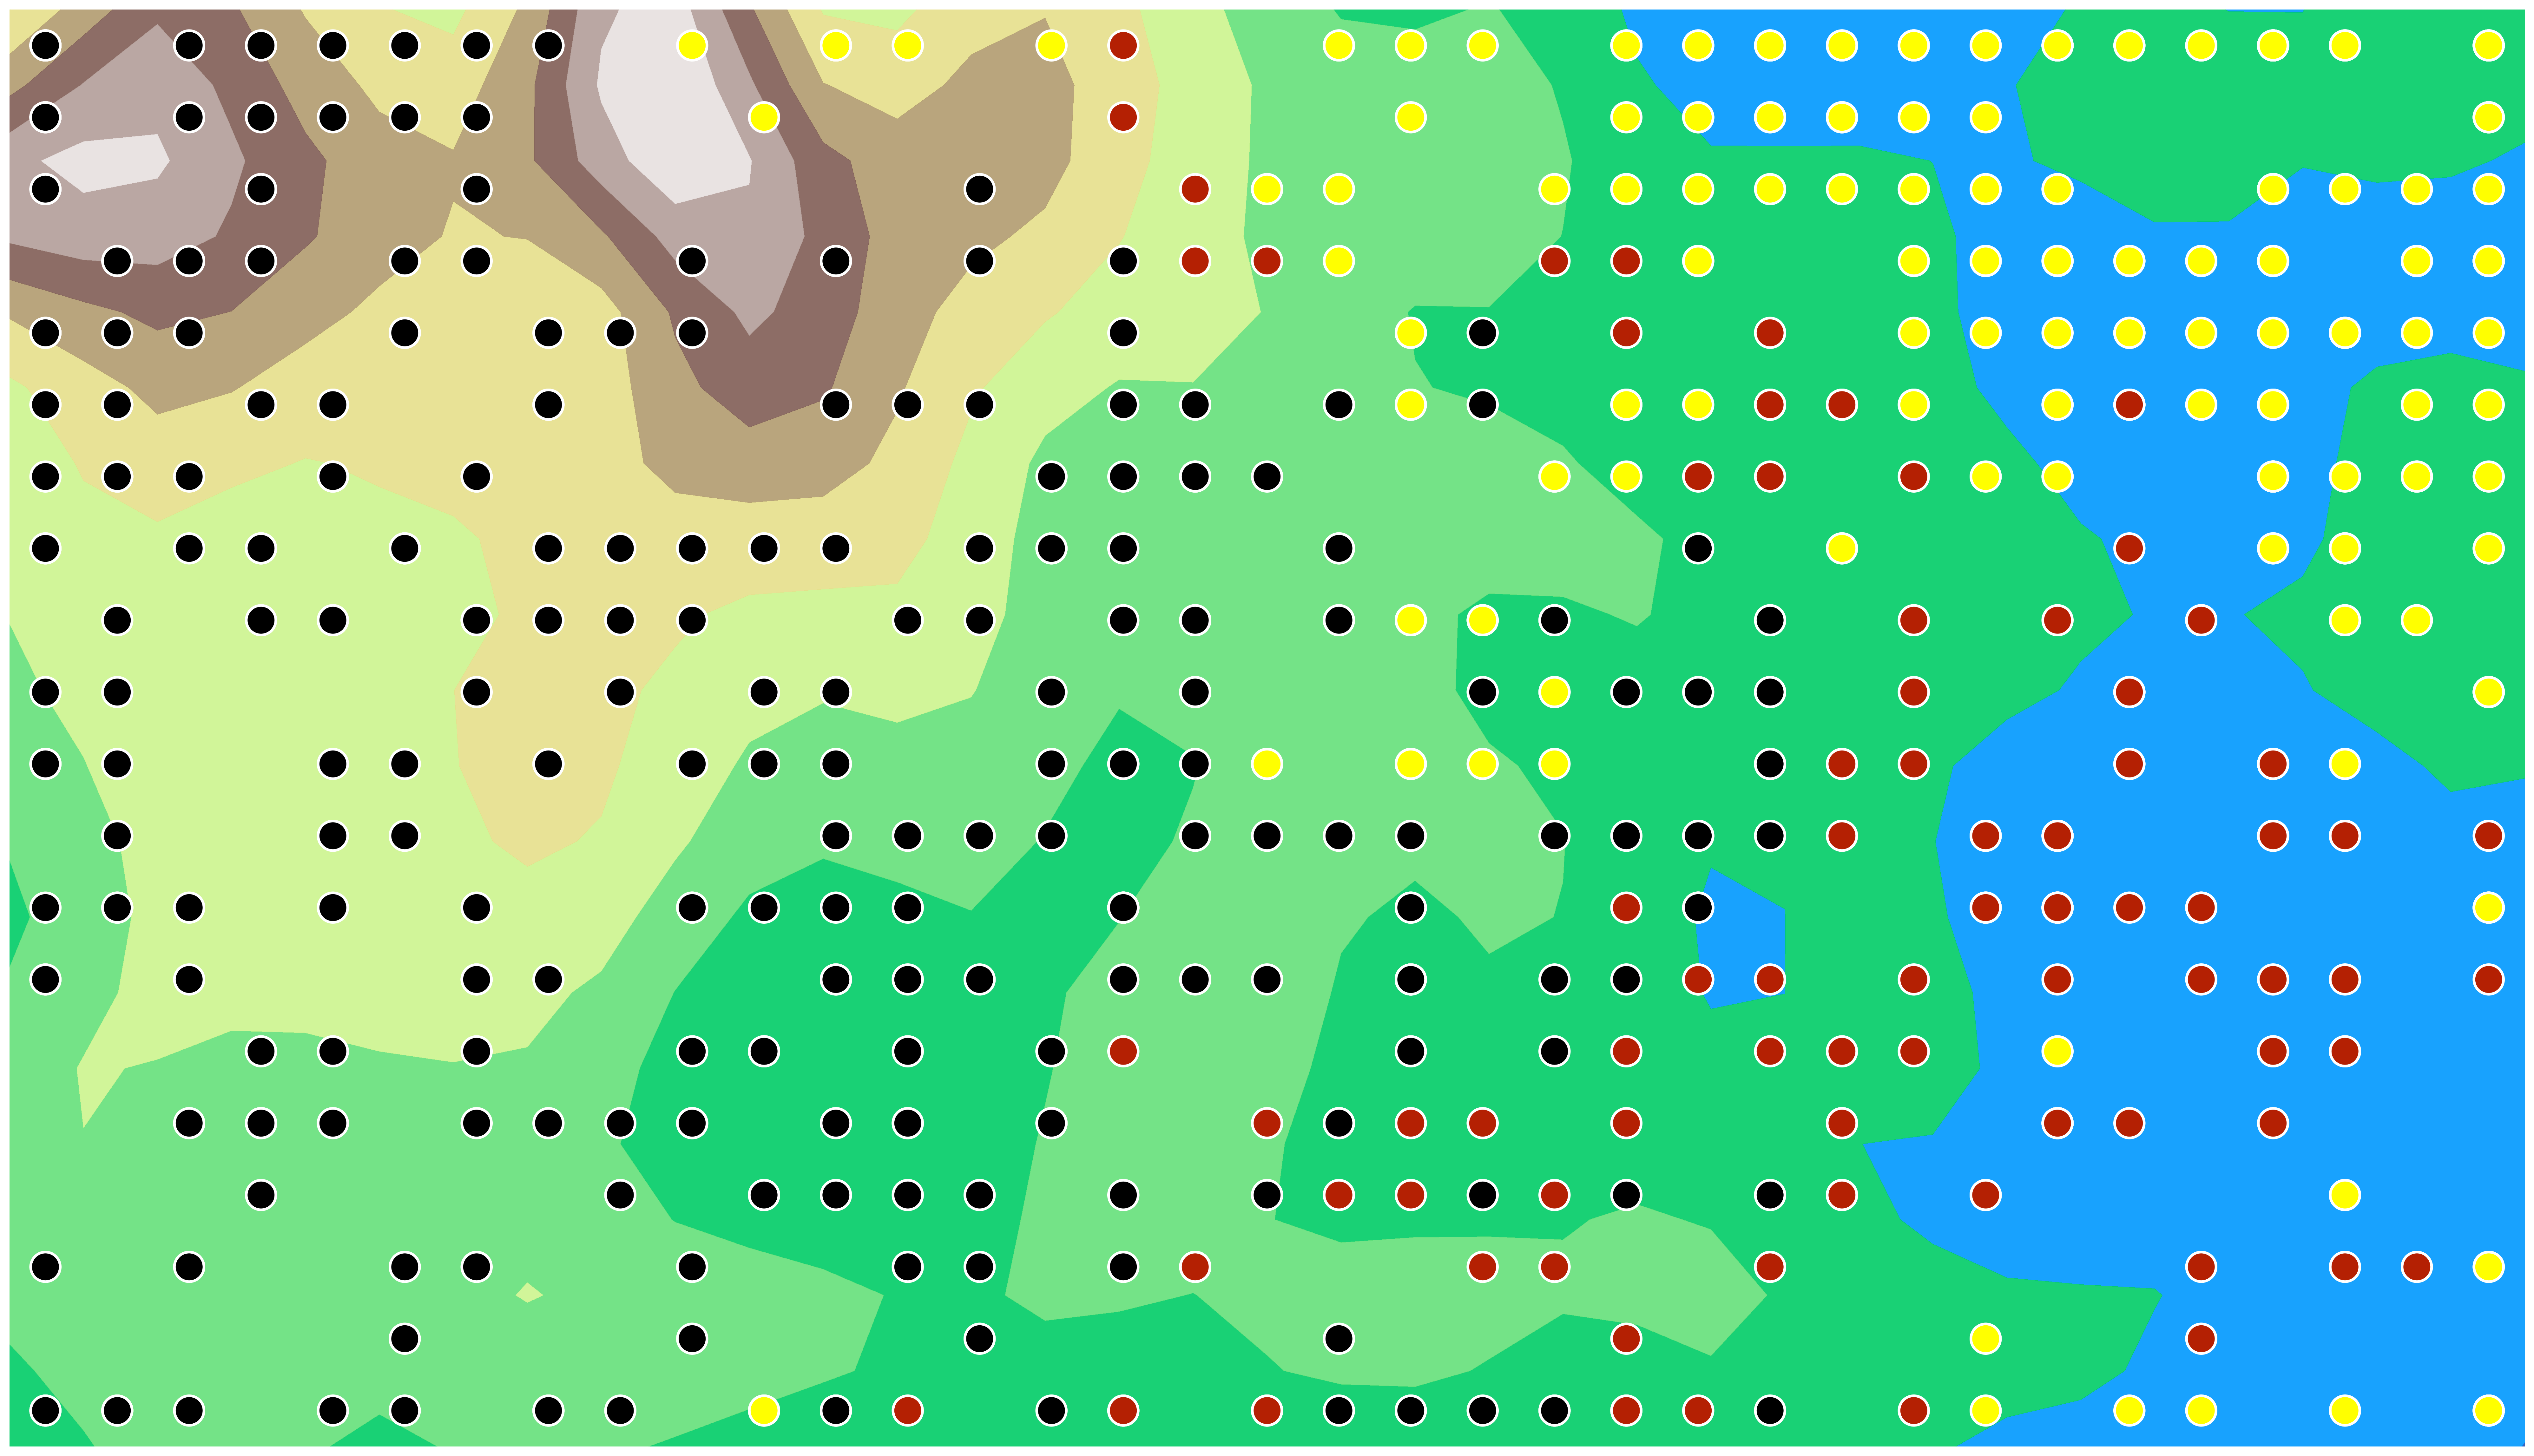

In [13]:
fig, ax = plt.subplots(figsize=(35, 20), dpi=300)
ax.tick_params(pad=10, labelsize=20)

asp.umatrix(ax, som, levels=10, alpha=.9)
sc = ax.scatter(*bmu_xy, s=500, c=target_codes, cmap='gnuplot_r', ec='w', lw=2)
ax.set_axis_off()